<h1 style='color:lightgreen'>k-means clustering</h1>
</br>

<img style='margin-left:20px;width:400px' src='https://github.com/Cloudy0x/ML/blob/main/img/kmeans.png?raw=true'>

<div style='margin-left:20px'>
    <p>partion based</p>
    <p>unsupervised</p>
    <p>medium and large dataset</p>
    </br>
    <p style='color:orange'>#By Cloudy0x</p>
</div>


</br>

</br>
<h2 style='color:DarkTurquoise'> By sklearn</h2>
</br>

In [242]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

</br>
<h3 style='color:orange'> Data </h3>
</br>

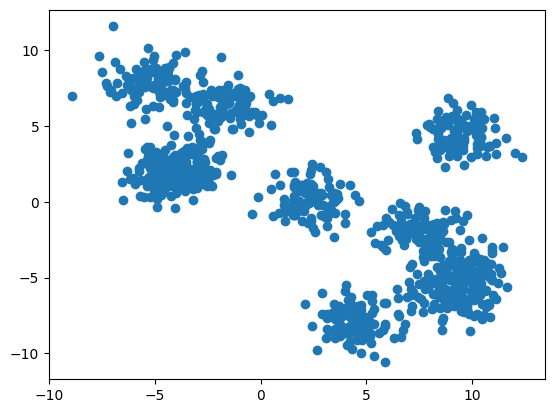

In [152]:
# Generate isotropic Gaussian blobs for clustering.
x,y = make_blobs(n_samples = 1000,n_features = 3,centers = 10)

plt.scatter(x[:,0],x[:,1])
plt.show()

</br>
<h3 style='color:orange'> Model </h3>
</br>

In [262]:
k = 3
model = KMeans(n_clusters=k, n_init='auto')

In [263]:
model.fit(x)

KMeans(n_clusters=3, n_init='auto')

In [264]:
model.labels_[0:5]

array([1, 0, 1, 1, 2], dtype=int32)

In [265]:
model.cluster_centers_

array([[ 3.23027664, -5.44073669,  9.00702748],
       [ 3.86034784,  4.88769788, -4.35573995],
       [ 1.27211846, -9.45722913, -5.22467395]])

</br>
<h3 style='color:orange'> PLT </h3>
</br>

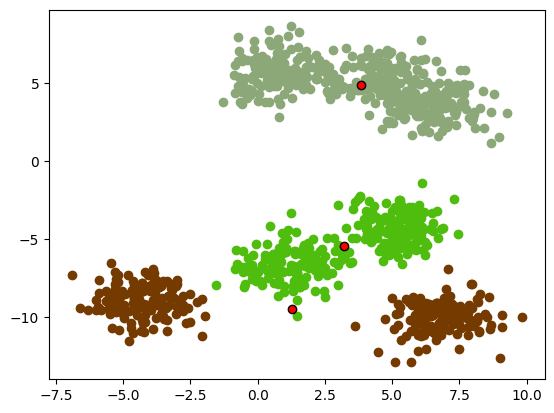

In [266]:
color = []

# get colors
for i in range( k ):
    color.append(np.random.rand(3,))

# draw data points
for i in range( k ):
    plt.scatter(x[model.labels_ == i,0], x[model.labels_ == i,1], color=color[i])

# draw centroids
for i in range( k ):#
    plt.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], color='r', marker='o', edgecolors='black')

plt.show()

</br>
<h3 style='color:orange'> Find best k </h3>

<p style='margin:20px'>The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.</p>
</br>

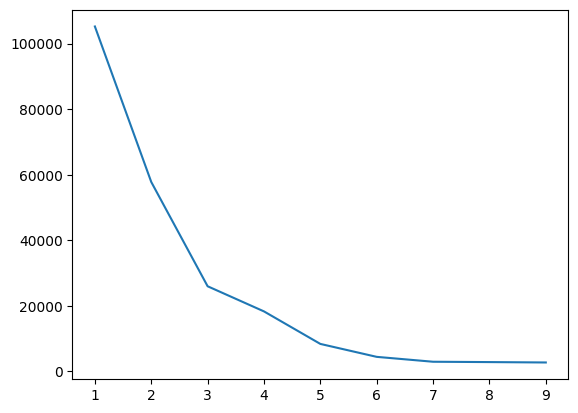

In [261]:
ks = np.arange(1,10)
WCSS = []

for k in ks:
    model = KMeans(n_clusters=k, n_init='auto').fit(x)
    WCSS.append( model.inertia_ )

plt.plot(ks, WCSS)

# masalan in ye dast,e ke arenjesh behtarin k ro mide

</br>
<h2 style='color:DarkTurquoise'> By myself </h2>
</br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

import math
import random

</br>
<h3 style='color:orange'> Data </h3>
</br>

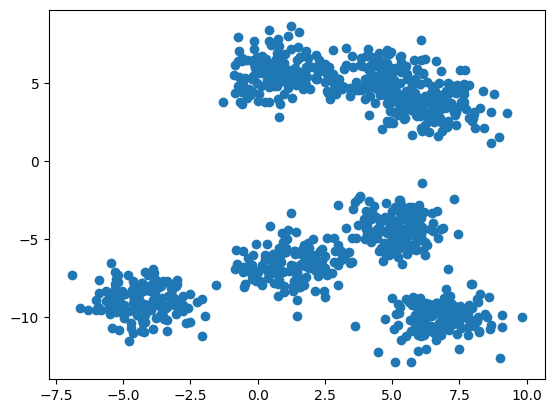

In [221]:
# Generate isotropic Gaussian blobs for clustering.
x,y = make_blobs(n_samples = 1000,n_features = 3,centers = 7)

plt.scatter(x[:,0],x[:,1])
plt.show()

</br>
<h3 style='color:orange'> Model </h3>
</br>

In [235]:
class _KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    
    def fit(self, X):
        index = np.random.randint(len(x), size=self.k)
        self.centroids = x[index]
        

        for i in range(self.max_iter):
            # clustering x
            cluste_group = self.clustering(x)
            # new centroid
            old_centroid = self.centroids
            self.centroids = self.move_centroid(x, cluste_group)
            # if new == old finish
            if (old_centroid == self.centroids).all():
                break

        return cluste_group

    
    def clustering(self, X):
        x_cluster = []
        distances = []
        
        for xi in x:
            # inja miaim mi binim har x be kodom markaz nazik tare ke beshe ozv on
            for centroid in self.centroids:
                distances.append(np.sqrt( ((xi-centroid)**2).sum() ))

            centroid_index = distances.index( min(distances) )
            distances = []
            
            x_cluster.append(centroid_index)

        return np.array(x_cluster)

    
    def move_centroid(self, x, cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group) # same as index of centroids [1,0,2,0,2,1,1] -> [0,1,2]

        for type in cluster_type:
            new_centroids.append(x[cluster_group == type].mean(axis=0)) # miangin x,y az har khoshe ro migire

        return np.array(new_centroids)


</br>
<h3 style='color:orange'> Predict </h3>
</br>

In [236]:
k = 5
_model = _KMeans(k)

In [237]:
res = _model.fit(x)

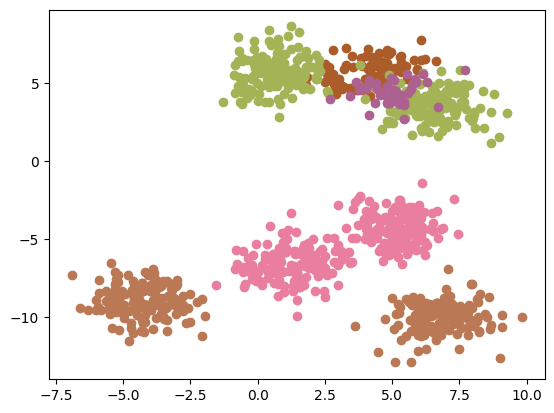

In [238]:
for i in range( len(set(res)) ):
    plt.scatter(x[res == i,0], x[res == i,1], color=np.random.rand(3,))
plt.show()

Text(0.5, 0, 'Z Label')

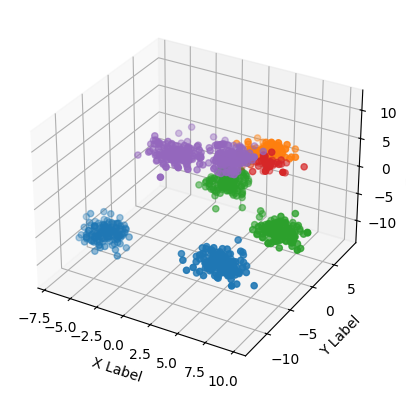

In [239]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range( len(set(res)) ):
    ax.scatter(x[res == i,0], x[res == i,1], x[res == i,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')